In [1]:
%matplotlib inline

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style('darkgrid')
# sns.set_context('notebook')

from lightning.image.controller import ImageController
from lightning_flash import image as flash
from test.resources import demo_resources as demo

# Let's see the ImageController in action:

Since we don't have a database up and running, we will pass the ImageController the information it needs manually. As soon as the database is set up, the Provider will make queries to the database and provide individual ImageControllers the information they need.

## Loading images and creating ImageControl

In [2]:
imcontroller = ImageController(demo.image_info)

Normally the image controller would be passed images directly, but for now, we have to load them from disk by calling `generate_im_obj`

In [3]:
imcontroller.generate_image_obj()

Image
mode: local
dtype: uint16
shape: (3, 2048, 2048)

From above, it is possible to inspect basic properties such as whether or not the ImageController's image is running in `local` or `Spark` mode, its type and shape. (3, 2048, 2048) means that our image is 2048 x 2048 with 3 channels. We can check what those channels are with:

In [4]:
imcontroller.channels

[('IF', 'ER'), ('IF', 'PR'), ('IF', 'HER2')]

Ok, it looks like we have one imaging modalitity `IF` with three subchanels: `ER`, `PR` and `HER2`. Let's look at the `ER` subchannel:

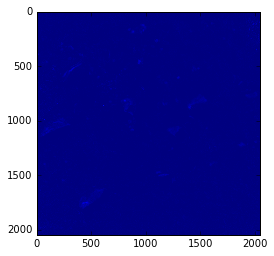

In [7]:
ER = imcontroller.get_image_channel(('If','HER2'))
flash.show_channel(ER)

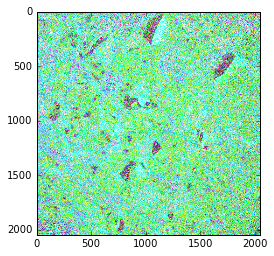

In [8]:
flash.show_first_three_channels(imcontroller.image_obj)

In [9]:
imcontroller.patchify()

/Users/alexandonian/anaconda/lib/python2.7/site-packages/skimage/util/shape.py:247: RuntimeWarning: Cannot provide views on a non-contiguous input array without copying.
  warn(RuntimeWarning("Cannot provide views on a non-contiguous input "


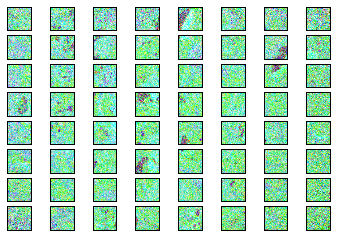

In [10]:
flash.show_subset_patches(imcontroller.patches, (8,8))

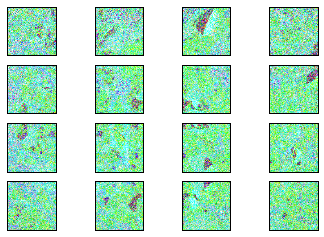

In [11]:
imcontroller.patchify(patch_shape=(512, 512, 3),overlap=100)
flash.show_subset_patches(imcontroller.patches, (4,4))

In [12]:
im2 =ImageController(demo.image_2_info)

In [13]:
im2.generate_image_obj()
im2.image_obj

Image
mode: local
dtype: uint8
shape: (1, 512, 512, 3)

<p class='header-2'>Questions:</p>
<ul class='info-bullet'>
<li>Organization </li>
In terms of distributed computing, PySpark seems like a very good way to go:
<li>I have found a Medical Image Registration Toolbox which works extrememly well with some of the data I'll be working with. However, this is a MATLAB toolbox. Will this play nicely with the PySpark framework? Will it have to be rewritten? I was planning to work on this on the fall to handle the Registration part of the pipeline </li>
<li>Matlab just introduced its own distributed computing/cloud computing options...should I try those instead?</li>
<li>What about doing registration on the GPU instead of a cluster?</li>
</ul>